In [18]:
#run in python 3.10.7 on windows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

niwaDf  = pd.read_csv('../data/niwa_cleaned/1971-2023-WeatherData.csv', parse_dates=['Date'])
niwaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           18834 non-null  datetime64[ns]
 1   Wdir (Deg)     18831 non-null  float64       
 2   WSpd (m/s)     18831 non-null  float64       
 3   GustDir (Deg)  18484 non-null  float64       
 4   GustSpd (m/s)  18635 non-null  float64       
 5   Tdry (C)       18831 non-null  float64       
 6   Twet (C)       18792 non-null  float64       
 7   RH (%)         18792 non-null  float64       
 8   Tmax (C)       18754 non-null  float64       
 9   Tmin (C)       18702 non-null  float64       
 10  Tgmin (C)      18526 non-null  float64       
 11  ET10 (C)       18593 non-null  float64       
 12  Pmsl (hPa)     18831 non-null  float64       
 13  Rad (MJ/m2)    18434 non-null  float64       
 14  Rain (mm)      18774 non-null  float64       
dtypes: datetime64[ns](1

In [19]:
niwaDf.head()

,Date,Wdir (Deg),WSpd (m/s),GustDir (Deg),GustSpd (m/s),Tdry (C),Twet (C),RH (%),Tmax (C),Tmin (C),Tgmin (C),ET10 (C),Pmsl (hPa),Rad (MJ/m2),Rain (mm)
0,1971-07-01,0.0,0.0,40.0,9.8,7.5,7.5,100.0,16.6,6.9,1.5,10.1,1019.5,8.9,1.4
1,1971-07-02,70.0,13.4,60.0,23.7,14.0,12.4,82.1,14.4,8.9,10.2,12.0,1009.8,0.5,64.7
2,1971-07-03,120.0,4.6,130.0,7.7,9.3,8.4,88.0,14.0,7.7,4.0,10.5,1006.1,7.8,6.1
3,1971-07-04,200.0,3.1,130.0,10.3,9.6,8.3,82.9,14.1,8.9,6.7,10.8,1010.9,9.0,5.4
4,1971-07-05,260.0,5.1,210.0,18.5,11.9,10.8,86.7,14.7,8.3,4.6,10.8,1014.2,8.4,1.2


In [20]:
# Summary Statistics
print(niwaDf.describe())

                                Date    Wdir (Deg)    WSpd (m/s)  \
count                          18834  18831.000000  18831.000000   
mean   1997-10-02 06:58:08.754380416    175.584621      4.249705   
min              1971-07-01 00:00:00      0.000000      0.000000   
25%              1984-05-21 06:00:00     70.000000      1.900000   
50%              1998-02-09 12:00:00    180.000000      3.600000   
75%              2010-12-31 18:00:00    250.000000      6.200000   
max              2023-11-22 00:00:00    990.000000     18.500000   
std                              NaN    131.051932      3.017429   

       GustDir (Deg)  GustSpd (m/s)      Tdry (C)      Twet (C)        RH (%)  \
count   18484.000000   18635.000000  18831.000000  18792.000000  18792.000000   
mean      185.829312      12.124808     14.993357     13.304273     82.136595   
min         0.000000       0.000000      1.300000      0.800000     33.700000   
25%        90.000000       8.800000     12.400000     10.900000

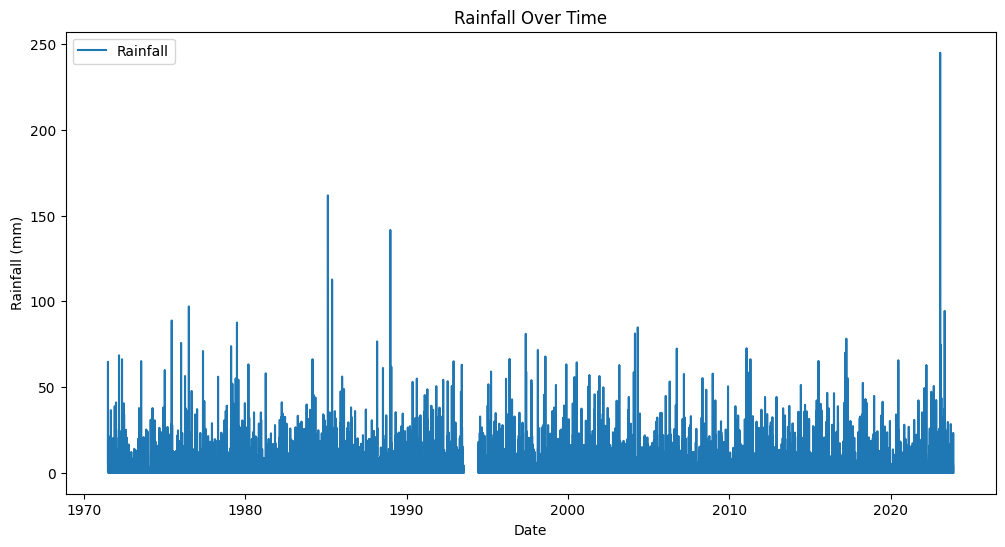

In [21]:
# Data Visualization

# Time series plot of rainfall
plt.figure(figsize=(12, 6))
plt.plot(niwaDf['Date'], niwaDf['Rain (mm)'], label='Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Over Time')
plt.legend()
plt.show()

In [22]:
# Create lag features for prevous 7 days of rainfall and temperature
lag_days = 3

for i in range(1, lag_days - 1):
    niwaDf[f'daybefore_rainfall{i}'] = niwaDf['Rain (mm)'].shift(-i)

    
for i in range(1, lag_days + 1):
    niwaDf[f'nextday_rainfall{i}'] = niwaDf['Rain (mm)'].shift(i)
    niwaDf[f'nextday_WSpd (m/s)	{i}'] = niwaDf['WSpd (m/s)'].shift(i)
    niwaDf[f'nextday_GustSpd (m/s){i}'] = niwaDf['GustSpd (m/s)'].shift(i)
    niwaDf[f'nextday_Twet (C){i}'] = niwaDf['Twet (C)'].shift(i)
    niwaDf[f'nextday_RH (%){i}'] = niwaDf['RH (%)'].shift(i)
    niwaDf[f'Tgmin (C){i}'] = niwaDf['Tgmin (C)'].shift(i)
    # niwaDf[f'Tmax (C){i}'] = niwaDf['Tmax (C)'].shift(i)
    # niwaDf[f'Tmin (C){i}'] = niwaDf['Tmin (C)'].shift(i)
    # niwaDf[f'Pmsl (hPa){i}'] = niwaDf['Pmsl (hPa)'].shift(i)

# Drop rows with NaN values due to lag features
niwaDf.dropna(inplace=True)

niwaDf.head(10)

,Date,Wdir (Deg),WSpd (m/s),GustDir (Deg),GustSpd (m/s),Tdry (C),Twet (C),RH (%),Tmax (C),Tmin (C),...,nextday_GustSpd (m/s)2,nextday_Twet (C)2,nextday_RH (%)2,Tgmin (C)2,nextday_rainfall3,nextday_WSpd (m/s)\t3,nextday_GustSpd (m/s)3,nextday_Twet (C)3,nextday_RH (%)3,Tgmin (C)3
3,1971-07-04,200.0,3.1,130.0,10.3,9.6,8.3,82.9,14.1,8.9,...,23.7,12.4,82.1,10.2,1.4,0.0,9.8,7.5,100.0,1.5
4,1971-07-05,260.0,5.1,210.0,18.5,11.9,10.8,86.7,14.7,8.3,...,7.7,8.4,88.0,4.0,64.7,13.4,23.7,12.4,82.1,10.2
5,1971-07-06,990.0,1.0,200.0,15.4,9.8,8.9,88.2,14.5,6.6,...,10.3,8.3,82.9,6.7,6.1,4.6,7.7,8.4,88.0,4.0
6,1971-07-07,0.0,0.0,140.0,9.3,9.4,9.0,94.6,14.2,6.7,...,18.5,10.8,86.7,4.6,5.4,3.1,10.3,8.3,82.9,6.7
7,1971-07-08,0.0,0.0,140.0,6.2,6.0,5.3,89.3,12.6,3.5,...,15.4,8.9,88.2,2.1,1.2,5.1,18.5,10.8,86.7,4.6
8,1971-07-09,130.0,6.2,110.0,8.8,8.0,6.4,77.7,11.6,5.7,...,9.3,9.0,94.6,3.6,2.4,1.0,15.4,8.9,88.2,2.1
9,1971-07-10,150.0,3.6,140.0,8.2,7.3,6.0,81.3,12.4,6.2,...,6.2,5.3,89.3,-2.3,0.2,0.0,9.3,9.0,94.6,3.6
10,1971-07-11,150.0,5.7,110.0,11.8,7.5,6.8,89.9,13.8,6.6,...,8.8,6.4,77.7,2.8,0.0,0.0,6.2,5.3,89.3,-2.3
11,1971-07-12,220.0,1.5,160.0,7.2,8.3,6.9,80.7,13.4,7.0,...,8.2,6.0,81.3,5.0,0.0,6.2,8.8,6.4,77.7,2.8
12,1971-07-13,0.0,0.0,210.0,7.7,6.9,6.4,92.6,13.7,4.0,...,11.8,6.8,89.9,4.5,0.0,3.6,8.2,6.0,81.3,5.0


In [23]:
niwaDf.columns

Index(['Date', 'Wdir (Deg)', 'WSpd (m/s)', 'GustDir (Deg)', 'GustSpd (m/s)',
       'Tdry (C)', 'Twet (C)', 'RH (%)', 'Tmax (C)', 'Tmin (C)', 'Tgmin (C)',
       'ET10 (C)', 'Pmsl (hPa)', 'Rad (MJ/m2)', 'Rain (mm)',
       'daybefore_rainfall1', 'nextday_rainfall1', 'nextday_WSpd (m/s)\t1',
       'nextday_GustSpd (m/s)1', 'nextday_Twet (C)1', 'nextday_RH (%)1',
       'Tgmin (C)1', 'nextday_rainfall2', 'nextday_WSpd (m/s)\t2',
       'nextday_GustSpd (m/s)2', 'nextday_Twet (C)2', 'nextday_RH (%)2',
       'Tgmin (C)2', 'nextday_rainfall3', 'nextday_WSpd (m/s)\t3',
       'nextday_GustSpd (m/s)3', 'nextday_Twet (C)3', 'nextday_RH (%)3',
       'Tgmin (C)3'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
# Features (X) and target variable (y)
features = ['Wdir (Deg)', 'WSpd (m/s)', 'GustDir (Deg)', 'GustSpd (m/s)',
       'Tdry (C)', 'Twet (C)', 'RH (%)', 'Tmax (C)', 'Tmin (C)', 'Tgmin (C)',
       'ET10 (C)', 'Pmsl (hPa)', 'Rad (MJ/m2)', 'Rain (mm)',
       'daybefore_rainfall1', 'nextday_WSpd (m/s)\t1',
       'nextday_GustSpd (m/s)1', 'nextday_Twet (C)1', 'nextday_RH (%)1',
       'Tgmin (C)1', 'nextday_rainfall2', 'nextday_WSpd (m/s)\t2',
       'nextday_GustSpd (m/s)2', 'nextday_Twet (C)2', 'nextday_RH (%)2',
       'Tgmin (C)2', 'nextday_rainfall3', 'nextday_WSpd (m/s)\t3',
       'nextday_GustSpd (m/s)3', 'nextday_Twet (C)3', 'nextday_RH (%)3',
       'Tgmin (C)3']

X = niwaDf[features]

# Define the target variable (next day's rainfall)
y = niwaDf['nextday_rainfall1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



# Random Forest

In [25]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
print(f'Random Forest RMSE: {rf_rmse}')

Random Forest RMSE: 6.67450831274422


In [26]:
from sklearn.model_selection import cross_val_score

# RMSE of test > RMSE of train => OVER FITTING of the data.
# RMSE of test < RMSE of train => UNDER FITTING of the data.
# Evaluate model performance using cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE from the cross-validation scores
rmse_cv = np.sqrt(-cv_scores.mean())

print(f'Cross-Validation RMSE: {rmse_cv}')

Cross-Validation RMSE: 6.188239636403673


In [27]:
# Predict rainfall for tomorrow using the Random Forest model
rf_prediction_tomorrow = rf_model.predict(X_train)
rf_prediction_day_after_tomorrow = rf_model.predict(X_train)
rf_prediction_two_days_after_tomorrow = rf_model.predict(X_train)

# Print the predictions
print(f'Random Forest Prediction for tomorrow: {rf_prediction_tomorrow[0]} mm')
print(f'Random Forest Prediction for the day after tomorrow: {rf_prediction_day_after_tomorrow[0]} mm')
print(f'Random Forest Prediction for two days after tomorrow: {rf_prediction_two_days_after_tomorrow[0]} mm')



Random Forest Prediction for tomorrow: 4.612000000000001 mm
Random Forest Prediction for the day after tomorrow: 4.612000000000001 mm
Random Forest Prediction for two days after tomorrow: 4.612000000000001 mm


In [28]:
print("Shape of X_tomorrow:", rf_prediction_tomorrow.shape)


Shape of X_tomorrow: (13920,)


In [29]:
print('Shape of X_train:', X_train.shape)

Shape of X_train: (13920, 32)


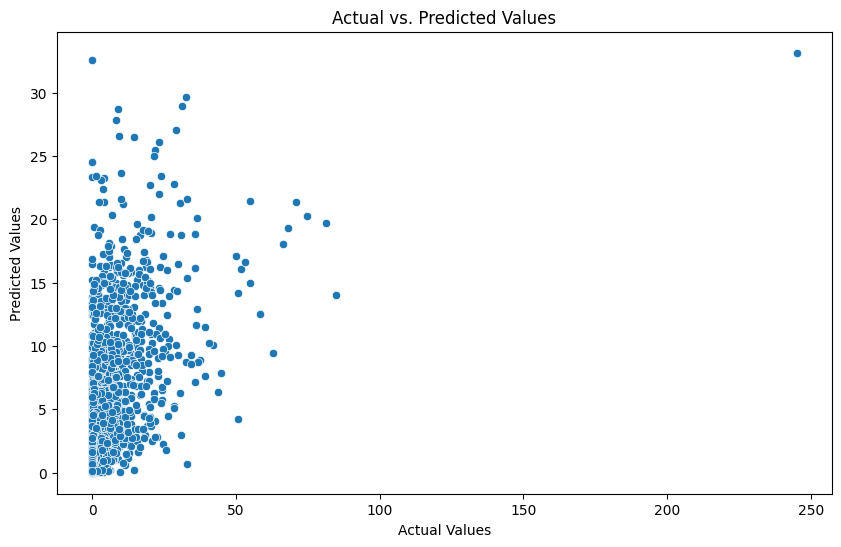

In [30]:
# To visualize the actual vs. predicted values

import matplotlib.pyplot as plt
import seaborn as sns


# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


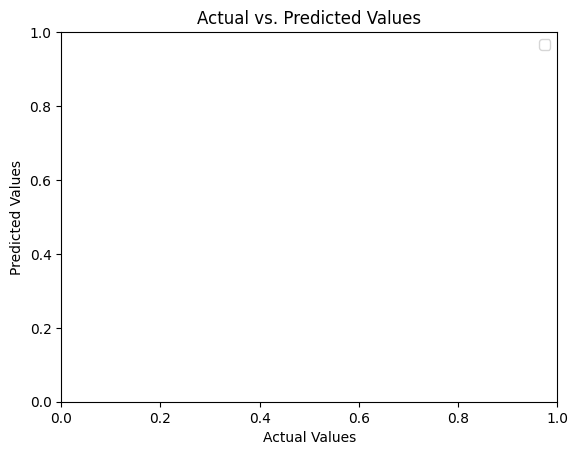

In [31]:
# Plot training loss and validation loss
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [32]:
# Calculate monthly median rainfall
monthly_median_rainfall = niwaDf.groupby(niwaDf['Date'].dt.month)['Rain (mm)'].median()

# Calculate the percentage of actual rainfall compared to the monthly median
niwaDf['rainfall_percentage'] = (niwaDf['Rain (mm)'] / monthly_median_rainfall[niwaDf['Date'].dt.month].values) * 100

# Create a function to categorize the weather conditions
def categorize_rainfall_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"

# Apply the categorization function to create a new column with the weather condition
niwaDf['weather_condition'] = niwaDf['rainfall_percentage'].apply(categorize_rainfall_condition)

# Print the resulting dataframe with weather conditions
print(niwaDf[['Date', 'Rain (mm)', 'rainfall_percentage', 'weather_condition']])


            Date  Rain (mm)  rainfall_percentage weather_condition
3     1971-07-04        5.4                675.0          Very wet
4     1971-07-05        1.2                150.0    Moderately wet
5     1971-07-06        2.4                300.0          Very wet
6     1971-07-07        0.2                 25.0          Very dry
7     1971-07-08        0.0                  0.0          Very dry
...          ...        ...                  ...               ...
18828 2023-11-17       10.4                  inf          Very wet
18829 2023-11-18       23.2                  inf          Very wet
18830 2023-11-19        8.4                  inf          Very wet
18831 2023-11-20        5.8                  inf          Very wet
18832 2023-11-21        0.4                  inf          Very wet

[17401 rows x 4 columns]
